In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("heart.csv")

In [21]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [23]:
if 'Age' in df.columns and df.iloc[0]['Age'] == 'Age':
    df = df[1:].reset_index(drop=True)

In [24]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Ensure numeric data types for all features
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

In [26]:
feature_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'ST_Slope']
X = df[feature_cols]
y = df['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Initialize and fit logistic regression model
logreg = LogisticRegression(random_state=16, max_iter=1000)
logreg.fit(X_train, y_train)

# Predict target variable
y_pred = logreg.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


Accuracy: 0.8521739130434782


In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


Confusion Matrix:
[[ 90  18]
 [ 16 106]]


In [32]:
print(f"Classification Report:\n{class_report}")
class_report = classification_report(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       108
           1       0.85      0.87      0.86       122

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



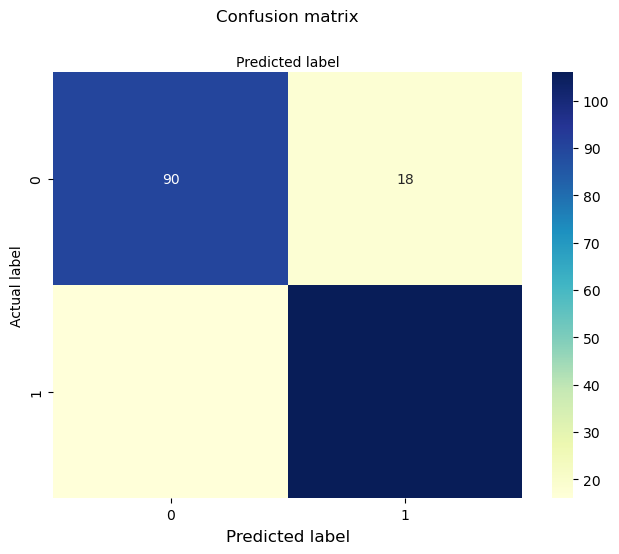

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = [0, 1]  # Or whatever your class labels are
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#Correct way to add text.
ax.text(0.5, -0.1, 'Predicted label', size=12, ha='center', transform=ax.transAxes)
plt.show()

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print("Predicted labels (first 20):", y_pred[:20])

print("Actual labels (first 20):", y_test[:20].values)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       108
           1       0.85      0.87      0.86       122

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230

Predicted labels (first 20): [0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0]
Actual labels (first 20): [0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0]
